In [1]:
%load_ext autoreload
%autoreload 2

import os

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

import src.plots as plots
import src.tools as tools

In [2]:
X, y = tools.load_data("data/processed/v1_var_desync0_clean01.h5")

  0%|          | 0/1400 [00:00<?, ?it/s]

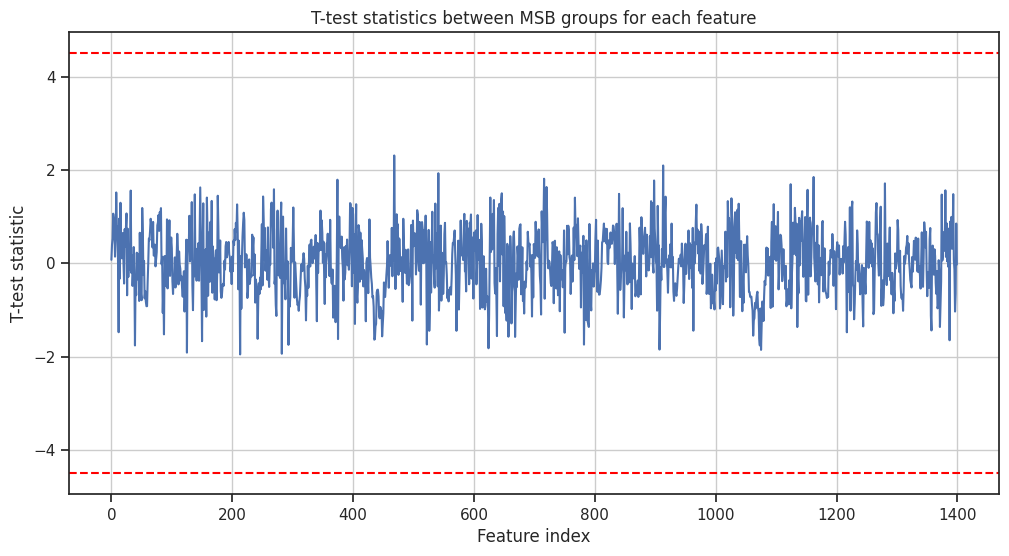

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from tqdm.auto import trange

msb = np.array([(c & 0x80) >> 7 for c in y], dtype=bool)
stat = []

for idx in trange(X.shape[1]):
    s, pval = stats.ttest_ind(
        X.loc[msb].iloc[:, idx],
        X.loc[~msb].iloc[:, idx],
        equal_var=False
    )
    stat.append(s)

fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(stat, ax=ax)
ax.grid(True)
ax.axhline(4.5, color="red", linestyle="--")
ax.axhline(-4.5, color="red", linestyle="--")
ax.set_title("T-test statistics between MSB groups for each feature")
ax.set_xlabel("Feature index")
ax.set_ylabel("T-test statistic")
plt.show()

  0%|          | 0/1400 [00:00<?, ?it/s]

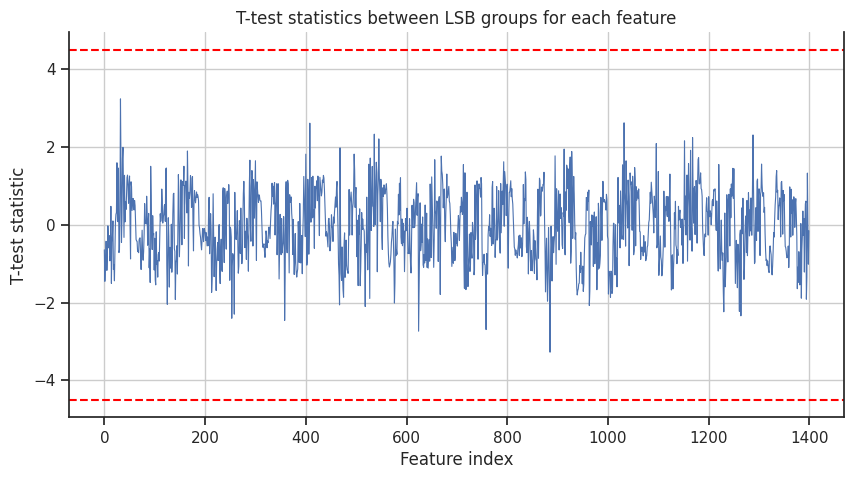

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.auto import trange

g1_idx = tools.hamming_weight(y) > 4
g2_idx = tools.hamming_weight(y) < 4
stat = []

for idx in trange(X.shape[1]):
    s, pval = stats.ttest_ind(
        X.loc[g1_idx].iloc[:, idx],
        X.loc[g2_idx].iloc[:, idx],
        equal_var=False
    )
    stat.append(s)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(stat, ax=ax, linewidth=0.8)
ax.grid(True)
ax.axhline(4.5, color="red", linestyle="--")
ax.axhline(-4.5, color="red", linestyle="--")
ax.set_title("T-test statistics between HW groups for each feature")
ax.set_xlabel("Feature index")
ax.set_ylabel("T-test statistic")
sns.despine(right=False)
plt.show()